The California Housing Dataset is a widely used dataset that contains information about various at-
tributes of houses in California, including median house values, median income, housing age, and more.
We will focus on estimating the original value of a key variable that has been corrupted by artificial
noise.

# Step-by-Step Implementation

## Load the Dataset:
• Use the sklearn.datasets module to load the California Housing Dataset.

In [1]:
# Install scikit-learn package
# %pip install scikit-learn

from sklearn.datasets import fetch_california_housing

# Load the California Housing Dataset
california_housing = fetch_california_housing()
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Introduce Noise:
- Select a variable, such as the ”Average Number of Rooms” (AveRooms), and add Gaussian noise to simulate corruption.
- Use a Gaussian noise distribution with mean µ = 0 and standard deviation σ = 0.5.
- The observed variable Y can be represented as:
            Y = X + N, where N ∼ N (0, 0.52)

In [ ]:
import numpy as np
import pandas as pd

# Extract the "Average Number of Rooms" (AveRooms) variable
ave_rooms = california_housing.data[:, california_housing.feature_names.index('AveRooms')]

# Generate Gaussian noise with mean 0 and standard deviation 0.5
noise = np.random.normal(0, 0.5, ave_rooms.shape) # we are generating noise for each value in ave_rooms
# Add the noise to the "Average Number of Rooms" variable
ave_rooms_noisy = ave_rooms + noise # we are adding noise to each value in ave_rooms

# Print the first 10 values to verify
print("Original AveRooms:", ave_rooms[:10])
print("Noisy AveRooms:", ave_rooms_noisy[:10])
# Add the noisy "Average Number of Rooms" as a new column to the dataset

# Convert the dataset to a DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Add the noisy AveRooms to the DataFrame
df['AveRooms_Noisy'] = ave_rooms_noisy

# Print the first 10 rows to verify
print(df.head(10))

(20640,)
Original AveRooms: [6.98412698 6.23813708 8.28813559 5.8173516  6.28185328 4.76165803
 4.93190661 4.79752705 4.29411765 4.97058824]
Noisy AveRooms: [6.55360779 6.05640365 7.30304346 6.28981138 6.69916146 4.26512166
 4.14477154 5.21956742 4.35105255 4.55315515]
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      

## Train-Test Split:
- Split the data into training and testing sets using an 80-20 split ratio. This means 80% of the data will be used for training and 20% for testing.

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## Downsample the Data:
- After splitting the dataset, randomly select 200 points from the test set to reduce clutter in visualizations and focus on key trends.

In [8]:
# Randomly select 200 points from the test set
test_sampled = test_set.sample(n=200, random_state=42)

# Print the first 10 rows to verify
print(test_sampled.head(10))

        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3752    2.8208      33.0  4.051020   1.158163       739.0  1.885204     34.17   
16705   4.3611      11.0  5.419753   0.962963       655.0  2.695473     35.06   
2915    4.3482       9.0  5.792453   1.103774       409.0  1.929245     35.36   
9728    4.5787      20.0  6.117371   0.995305      1361.0  3.194836     36.85   
3352    2.5000      19.0  6.153153   1.252252       302.0  2.720721     40.28   
18318   5.6413      35.0  5.361702   0.928191      1023.0  2.720745     37.44   
10337   6.0531      25.0  5.833333   1.002110      1666.0  3.514768     33.80   
6483    3.6944      29.0  4.048744   0.985229      2449.0  3.617430     34.08   
17798  12.3292      29.0  7.916667   1.055556       244.0  3.388889     37.38   
12532   2.2031      36.0  4.170068   1.129252       425.0  2.891156     38.57   

       Longitude  AveRooms_Noisy  
3752     -118.38        4.348473  
16705    -120.52        5.370916  
291

## Apply the Best Linear Estimator:
- Implement the best linear estimator (e.g., linear regression) to estimate the original values of the corrupted variable.

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
X_train = train_set.drop(columns=['AveRooms', 'AveRooms_Noisy'])
y_train = train_set['AveRooms']
X_test = test_sampled.drop(columns=['AveRooms', 'AveRooms_Noisy'])
y_test = test_sampled['AveRooms']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the original values of the corrupted variable on the test data
y_pred = model.predict(X_test)

# Print the first 10 predicted values to verify
print("Predicted AveRooms:", y_pred[:10])
print("Actual AveRooms:", y_test.values[:10])

Predicted AveRooms: [5.00340181 4.62768127 5.8525844  5.14937177 6.7224136  5.44674462
 6.04677165 4.72074961 9.70019531 5.15432582]
Actual AveRooms: [4.05102041 5.41975309 5.79245283 6.11737089 6.15315315 5.36170213
 5.83333333 4.04874446 7.91666667 4.17006803]


## Evaluate the Estimator:
- Calculate the bias and Mean Squared Error (MSE) of the estimator. Analyze how close the estimated values are to the original values.

In [10]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the bias
bias = np.mean(y_pred - y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Bias: {bias}")

Mean Squared Error (MSE): 0.6314618908749878
Bias: -0.01947411256062212


## Visualize the Results:
- Plot the original, noise-corrupted, and estimated values of the selected variable. The plots should clearly distinguish between these values to facilitate comparison.

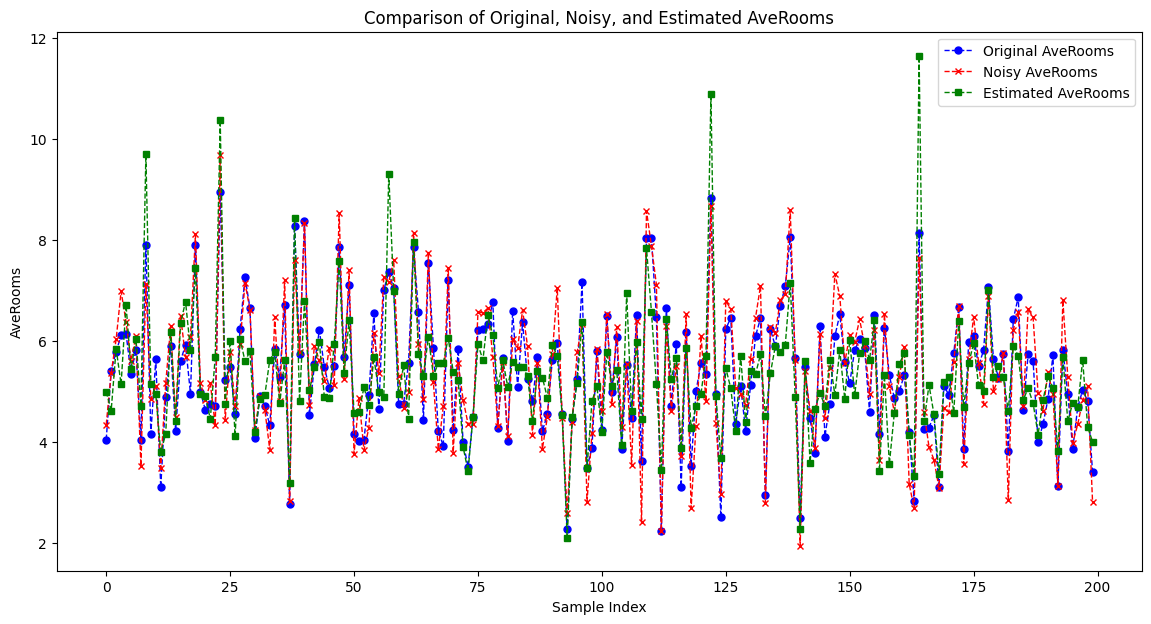

In [11]:
import matplotlib.pyplot as plt

# Plot the original, noise-corrupted, and estimated values
plt.figure(figsize=(14, 7))

# Plot original values
plt.plot(y_test.values, label='Original AveRooms', color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=5)

# Plot noise-corrupted values
plt.plot(test_sampled['AveRooms_Noisy'].values, label='Noisy AveRooms', color='red', marker='x', linestyle='dashed', linewidth=1, markersize=5)

# Plot estimated values
plt.plot(y_pred, label='Estimated AveRooms', color='green', marker='s', linestyle='dashed', linewidth=1, markersize=5)

plt.xlabel('Sample Index')
plt.ylabel('AveRooms')
plt.title('Comparison of Original, Noisy, and Estimated AveRooms')
plt.legend()
plt.show()

## Bias and MSE: 

What do the calculated bias and Mean Squared Error (MSE) reveal about
the accuracy of our estimates? How might these metrics inform our understanding of model
performance?



- **Bias**: The bias is the average difference between the predicted values and the actual values. A bias close to zero indicates that, on average, the model's predictions are accurate. In our case, the bias is -0.019, which is very close to zero, suggesting that our model does not systematically overestimate or underestimate the true values.

- **Mean Squared Error (MSE)**: The MSE measures the average squared difference between the predicted values and the actual values. It gives an indication of the overall prediction error. A lower MSE indicates better model performance. In our case, the MSE is 0.631, which suggests that there is some error in the predictions, but it is relatively low.
